In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("paper", font_scale=1.4)

In [2]:
action_data_file = '../data/raw_data/main_actions_data.xlsx'

In [3]:
main_data = pd.read_excel(open(action_data_file, 'rb'), sheet_name = 0)

In [4]:
main_data

,Occupant ID,Cluster ID,shade position before action,electric light ratio before action,work plane illuminance before action,shade position after action,electric light ratio after action,work plane illuminance after action,Want brighter,Want darker,Want more view,Want more privacy
0,1,3,73.0,0.299401,1436.2,0.0,0.666873,644.8,0,1,0,1
1,1,3,NaN,NaN,888.0,NaN,NaN,290.0,0,1,0,0
2,1,3,NaN,NaN,790.0,NaN,NaN,370.0,0,1,0,0
3,1,3,NaN,NaN,1850.0,NaN,NaN,590.0,0,1,0,0
4,1,3,NaN,NaN,1820.0,NaN,NaN,440.0,0,1,0,0
5,1,3,NaN,NaN,1560.0,NaN,NaN,630.0,0,1,0,0
6,2,3,73.0,0.273172,1574.1,1.0,0.704110,610.7,0,1,0,0
7,2,3,23.0,0.594087,523.0,0.0,0.469997,614.0,1,0,0,0
8,2,3,28.0,0.495107,868.5,0.0,0.944225,455.4,0,1,0,0
9,2,3,15.0,0.239617,1408.5,0.0,0.772135,582.8,0,1,0,0


In [5]:
main_data.keys()

Index([u'Occupant ID', u'Cluster ID', u'shade position before action',
       u'electric light ratio before action',
       u'work plane illuminance before action',
       u'shade position after action ', u'electric light ratio after action',
       u'work plane illuminance after action', u'Want brighter',
       u'Want darker', u'Want more view', u'Want more privacy'],
      dtype='object')

In [6]:
pref_rel_actions = main_data[main_data['Want more view'] == 0]
pref_rel_actions = pref_rel_actions[pref_rel_actions['Want more privacy'] == 0]

In [7]:
pref_rel_actions

,Occupant ID,Cluster ID,shade position before action,electric light ratio before action,work plane illuminance before action,shade position after action,electric light ratio after action,work plane illuminance after action,Want brighter,Want darker,Want more view,Want more privacy
1,1,3,NaN,NaN,888.0,NaN,NaN,290.0,0,1,0,0
2,1,3,NaN,NaN,790.0,NaN,NaN,370.0,0,1,0,0
3,1,3,NaN,NaN,1850.0,NaN,NaN,590.0,0,1,0,0
4,1,3,NaN,NaN,1820.0,NaN,NaN,440.0,0,1,0,0
5,1,3,NaN,NaN,1560.0,NaN,NaN,630.0,0,1,0,0
6,2,3,73.0,0.273172,1574.1,1.0,0.704110,610.7,0,1,0,0
7,2,3,23.0,0.594087,523.0,0.0,0.469997,614.0,1,0,0,0
8,2,3,28.0,0.495107,868.5,0.0,0.944225,455.4,0,1,0,0
9,2,3,15.0,0.239617,1408.5,0.0,0.772135,582.8,0,1,0,0
10,2,3,37.0,0.480822,904.7,16.0,0.874196,497.6,0,1,0,0


In [8]:
occ_ids = np.unique(np.array(pref_rel_actions[['Occupant ID']]))

In [9]:
occ_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [10]:
pref_rel_actions_data_list = []
for occ in occ_ids:
    wi_prev = np.array(pref_rel_actions[pref_rel_actions.iloc[:,0] == occ][['work plane illuminance before action']])
    wi_after = np.array(pref_rel_actions[pref_rel_actions.iloc[:,0] == occ][['work plane illuminance after action']])
    pref_rel_actions_mat = np.hstack([wi_prev, wi_after])
    pref_rel_actions_data_list.append(pref_rel_actions_mat)
    

In [11]:
actions_data_list = []
for occ in occ_ids:
    wi_prev = np.array(main_data[main_data.iloc[:,0] == occ][['work plane illuminance before action']])
    wi_after = np.array(main_data[main_data.iloc[:,0] == occ][['work plane illuminance after action']])
    main_data_mat = np.hstack([wi_prev, wi_after])
    actions_data_list.append(main_data_mat)

In [12]:
pref_rel_actions_data_list[9]

array([[ 1429.8,   876.3],
       [ 1906. ,   548.3],
       [ 2018.8,   630.4],
       [ 1912.3,  1194.1],
       [  750. ,   286. ],
       [  890. ,   360. ]])

In [13]:
def visualize_actions(actions_data_list, occ_num = 1):
    i = occ_num - 1
    concerned_actions_data = actions_data_list[i]
    
    WI_prev = concerned_actions_data[:,0]
    WI_current = concerned_actions_data[:,1]
    
    WI_prev_greater_ind = WI_prev > WI_current
    WI_prev_g = WI_prev[WI_prev_greater_ind]
    WI_current_g = WI_current[WI_prev_greater_ind]

    WI_prev_lesser_ind = WI_prev <= WI_current
    WI_prev_l = WI_prev[WI_prev_lesser_ind]
    WI_current_l = WI_current[WI_prev_lesser_ind]
    
    # Conditioning the data for plotting purposes
    x_l = WI_prev_l
    dx_l = WI_current_l - WI_prev_l

    x_g = WI_prev_g
    dx_g = WI_current_g - WI_prev_g

    x_l = np.array(x_l)
    dx_l = np.array(dx_l)
    x_g = np.array(x_g)
    dx_g = np.array(dx_g)
    
    plt.figure(figsize=(12,10))
    ax = plt.axes()
    for i in xrange(x_l.shape[0]):
        ax.arrow(0, x_l[i], 1, dx_l[i], head_width=0.05, head_length=0.05, fc='g', ec='g')
    for j in xrange(x_g.shape[0]):
        ax.arrow(0, x_g[j], 1, dx_g[j], head_width=0.05, head_length=0.05, fc='r', ec='r')

    ax.set_xlim(-0.25,1.25)
    ax.set_ylim(0,2400)
    plt.xticks([0.,1])
    plt.xlabel('Previous (0) vs. Current (1)')
    plt.ylabel('Workplane Illuminance')
    plt.title('Occ num :' + str(occ_num))

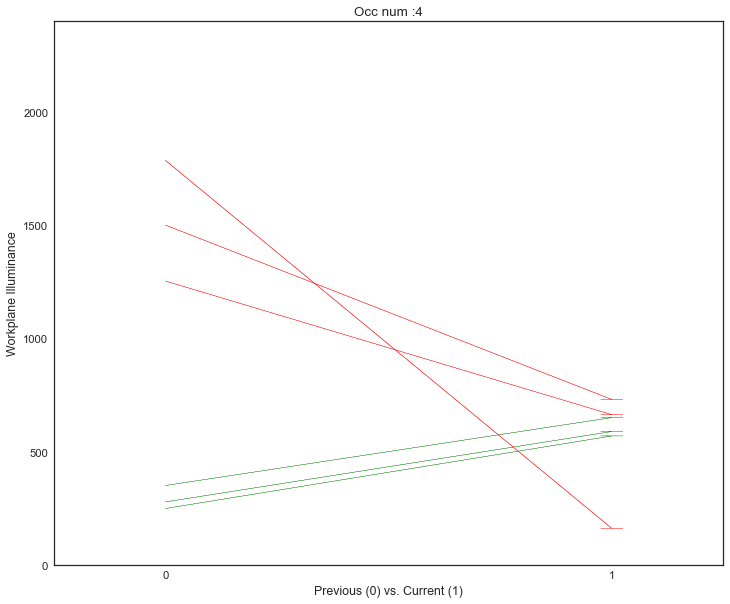

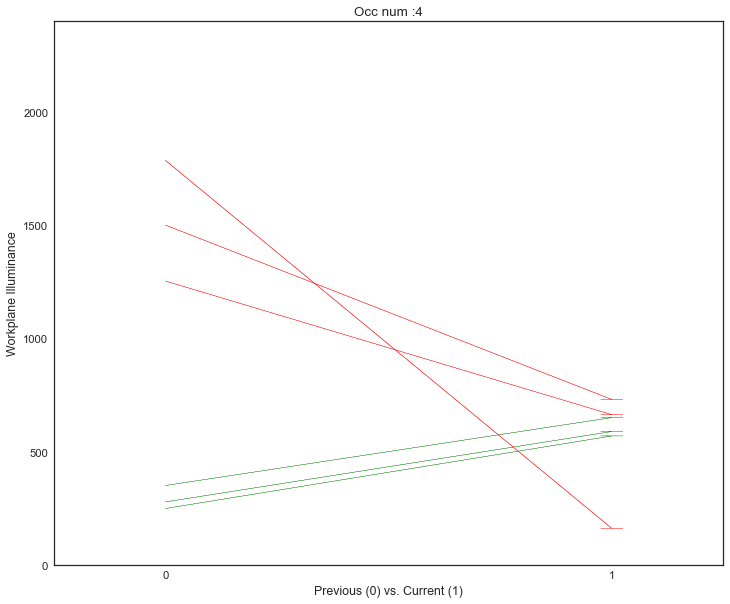

In [18]:
occ_num = 4
visualize_actions(pref_rel_actions_data_list, occ_num)
visualize_actions(actions_data_list, occ_num)